In [4]:
#from utility_bfvariater import *
from utility_bfcombiner import *
from utility_common import *
from utility_commonPlot import *
%matplotlib inline

In [5]:
beta0 = np.load('../data/combine/centralValue.npy')
stat_covar = np.load('../data/combine/stat_covar.npy')
syst_covar = np.load('../data/combine/syst_covar.npy')

covarTotal = np.sum(stat_covar,axis=0) + np.sum(syst_covar,axis=0)
#covarTotal = stat_covar[0]

# 1. Numerical Combine

10.9506 +/- 0.2634, rel error 2.4388
11.0154 +/- 0.2069, rel error 1.9157
10.7175 +/- 0.6811, rel error 6.3065


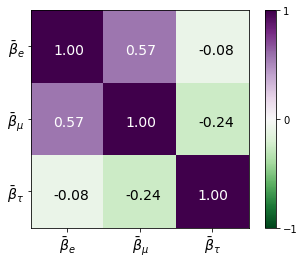

In [13]:
# numerical Combiner
combiner = BFCombiner(covarTotal, beta0)
sigma, corr = combiner.paramSigma()

# print result
for i in range(3):
    c, s = combiner.paramLS[i], sigma[i]
    print('{:6.4f} +/- {:6.4f}, rel error {:6.4f}'.format(c*100,s*100, 100*s/0.108))
    
showParameterCov(corr)
plt.savefig('../plots/combine/covarMatrix_beta.png',dpi=300)

In [16]:
np.save("../data/combine/beta_mean",combiner.paramLS)
np.save("../data/combine/beta_covar",np.outer(sigma,sigma)*corr)
np.save("../data/combine/beta_sigma",sigma)
np.save("../data/combine/beta_corr",corr)

# 2. Analytical Combine

10.9326 +/- 0.2641
10.9520 +/- 0.2021
10.5734 +/- 0.6681


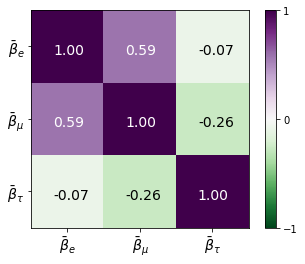

In [7]:
# Analytical Combiner
invCovarTotal = np.linalg.pinv( covarTotal )
i3 = np.identity(3)
Amatrix = np.r_[i3,i3,i3,i3]
hess = np.matmul(Amatrix.T, np.matmul(invCovarTotal,Amatrix))
hessinv = np.linalg.pinv( hess )
factor2 = np.matmul(Amatrix.T, invCovarTotal)
Bmatrix = np.matmul(hessinv,factor2)
mean  = np.matmul(Bmatrix,beta0)
sigma = hessinv.diagonal()**0.5
corr  = hessinv/np.outer(sigma, sigma)
# print result
for i in range(3):
    print('{:6.4f} +/- {:6.4f}'.format(mean[i]*100,sigma[i]*100) )
showParameterCov(corr)

# [BACKUP] Parametrize By r

In [4]:
combiner = BFCombiner(covarTotal, beta0, paramTypy='r')
sigma, corr = combiner.paramSigma()
combiner.paramLS,sigma

(array([0.96984862, 0.32560116]), array([0.06722755, 0.0070597 ]))

In [5]:
x = np.linspace(0.9, 1.1, 100)
y = np.linspace(0.9, 1.1, 100)
X, Y = np.meshgrid(x, y)


nll  = invVar[0,0]*(X-r1_mean)**2 
nll += invVar[1,1]*(Y-r2_mean)**2
nll += invVar[0,1]*(Y-r2_mean)*(X-r1_mean)*2
nll *= 2


plt.figure(figsize=(5,5),facecolor='w')


plt.contourf(X, Y, nll, levels=[0,1,2,3],vmax=3,vmin=-1)
plt.scatter(r1_mean, r2_mean, c='w')
plt.xticks([0.95,1,1.05])
plt.yticks([0.95,1,1.05])


plt.scatter(1, 1, c='k',marker='s',s=100)
plt.grid(True,alpha=0.5,linestyle='--')

plt.xlabel(r'$\beta_\tau / \beta_e$',fontsize=14,position=(1,1),labelpad=-10)
plt.ylabel(r'$\beta_\tau / \beta_\mu$',fontsize=14,position=(1,1),labelpad=-10)

plt.savefig('../plots/combine/sigma.png',dpi=300)

NameError: name 'invVar' is not defined

# [BACKUP]  Visualize Var Matrix

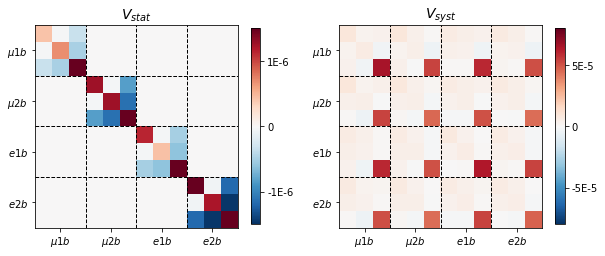

In [17]:
plt.figure(figsize=(10,4),facecolor='w')

plt.subplot(1,2,1)
mtx = stat_covar.sum(axis=0) #* 10000
showSingleCovar(mtx, norm= 1.5e-6, titleName=r'$V_{stat}$')
cbar = plt.colorbar( ticks=[-1e-6, 0, 1e-6],shrink=0.9)
#cbar.ax.set_title(r'$V_{\beta_i\beta_j}$')
cbar.ax.set_yticklabels(['-1E-6', '0', '1E-6'])
plt.grid(False)


plt.subplot(1,2,2)
mtx = syst_covar.sum(axis=0) #* 10000
showSingleCovar(mtx, norm= 80e-6, titleName=r'$V_{syst}$')
cbar = plt.colorbar( ticks=[-50e-6, 0, 50e-6],shrink=0.9)
#cbar.ax.set_title(r'$V_{\beta_i\beta_j}$')
cbar.ax.set_yticklabels(['-5E-5', '0', '5E-5'])
plt.grid(False)


plt.savefig('../plots/combine/covarMatrix_total.png',dpi=300)

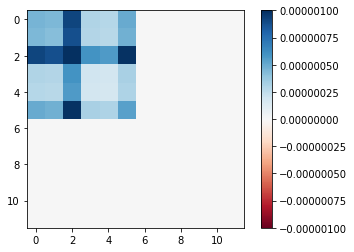

In [21]:
plt.imshow(syst_covar[9],cmap="RdBu",vmax=10e-7,vmin=-10e-7)
plt.colorbar()